# 1. Fragestellungen und Datenbeschaffung

Gruppe: Lia Müller, Selina Rüdisüli, Melanie Pomellitto

## 1.1 Titel:

- Veränderungen der Geburtenrate zwischen 1950 und 2023

## 1.2 Fragestellungen:

- In welchen Jahren ist die Geburtenrate bemerkenswert gestiegen oder gesunken?
- Welche Ursachen veranlassen die negativen Veränderungen in der Geburtenrate?
- Welches Land hat die stärksten und welches die schwächsten Schwankungen im Bezug auf die Geburtenrate seit 1950 und weshalb?

## 1.3 Datenquelle: 

https://ourworldindata.org/grapher/crude-birth-rate?tab=table


## 1.4 Daten beschaffen und laden

In [155]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [156]:
# loading the data
df = pd.read_csv('crude-birth-rate.csv', skiprows=1,
                names=['Entity','Code','Year','Birth rate per 1000 population'])
df.head()

,Entity,Code,Year,Birth rate per 1000 population
0,Afghanistan,AFG,1950,49.380
1,Afghanistan,AFG,1951,49.624
2,Afghanistan,AFG,1952,49.784
3,Afghanistan,AFG,1953,49.979
4,Afghanistan,AFG,1954,50.004


# 2. Daten vorbereiten

- Vor dem Herunterladen der Daten von "Ourworldindata" haben wir die Daten der "Welt", "Kontinente" sowie auch der "Gebiete" aussortiert, um      Doppelzählungen und Verfälschungen zu vermeiden.
- Die Roh-Daten sind bereits im Long-Format.
- Für die Analyse werden die Daten pivotiert: Jede Spalte repräsentiert ein Jahr (Year) und die Zeilen sind die verschiedenen Ethnien (Entity) - in alphabetischer Reihenfolge.
- In unserem Datensatz kommen folgende Datentypen vor: Ethnie und Code = Object, Jahr = Interger, Geburtenrate pro 1000 Population = Float.

In [157]:
df_pivot = df.pivot(index='Entity', columns='Year', values= 'Birth rate per 1000 population')
df_pivot.head()

Year,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,49.380,49.624,49.784,49.979,50.004,50.156,50.279,50.306,50.424,50.456,...,39.646,39.364,38.732,38.171,37.624,37.138,36.601,36.342,36.045,35.437
Albania,39.298,39.659,39.790,40.692,41.433,41.913,41.605,41.113,41.427,41.518,...,13.071,12.431,11.873,11.416,10.898,10.757,10.536,10.512,10.305,10.244
Algeria,50.602,50.284,49.961,49.746,49.666,49.625,49.516,49.404,49.397,49.114,...,26.063,25.811,25.439,25.015,24.063,23.379,22.430,21.392,20.491,19.625
Andorra,15.345,16.850,16.899,16.663,15.891,15.931,16.460,17.343,18.255,19.212,...,8.973,9.132,8.432,7.831,7.159,6.993,6.831,6.828,6.850,6.859
Angola,44.290,45.015,46.163,47.224,48.186,49.037,49.771,50.387,50.891,51.295,...,42.503,41.847,41.183,40.595,40.057,39.539,39.127,38.670,38.102,37.588


# 3. Statistik der Roh-Daten (Analyse im Long-Format)

über die einzelnen Spalten kann folgendes ausgesagt werden:
- Die Spalte *Entity* (Ethnien) enthält 201 verschiedene Ethnien.
- Die Spalte *Codes* inkludiert ebenfalls 201 verschiedene Codes. 
- Es sind kontinuerliche Daten zwischen 1950 und 2023 vorhanden. Der Datensatz beeinhaltet 74 Jahre. Zu jedem Jahr sind gleich viele Daten verfügbar, weshalb der Datensatz seit Beginn der Aufzeichnung 1950 komplett ist.
- Die Geburtenrate streut zwischen 4.211 (Minimum) und 58.627 (Maximum) pro 1000 Population in den Jahren 1950 bis 2023. 

In [158]:
df.dtypes

Entity                             object
Code                               object
Year                                int64
Birth rate per 1000 population    float64
dtype: object

### 3.1 Analyse Ethnien

In [159]:
print('Anzahl verschiedener Ethnien: ', len(df['Entity'].unique()))

Anzahl verschiedener Ethnien:  201


In [160]:
# Anzahl Datenpunkte pro Ethnie
df['Entity'].value_counts()

Entity
Afghanistan    74
Panama         74
Nicaragua      74
Niger          74
Nigeria        74
               ..
Greece         74
Greenland      74
Grenada        74
Guatemala      74
Zimbabwe       74
Name: count, Length: 201, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Ethnie'}, xlabel='Entity', ylabel='Anzahl Datenpunkte'>

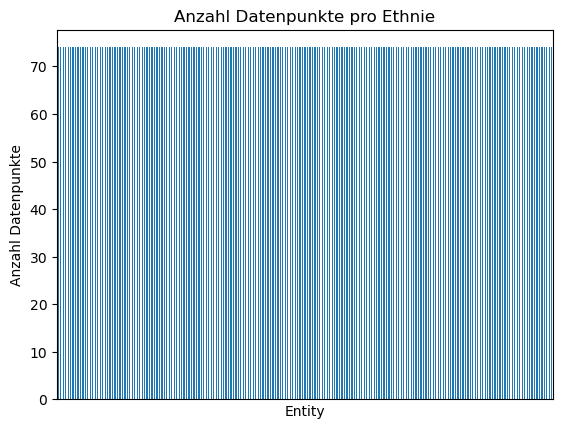

In [161]:
df['Entity'].value_counts().plot(kind='bar',
                                 xticks=[],         # disable labels on x-axis
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Ethnie')

## 3.2 Analyse Codes

In [162]:
print('Anzahl verschiedener Codes:  ', len(df['Code'].unique()))

Anzahl verschiedener Codes:   201


In [163]:
# Anzahl Datenpunkte pro Code
df['Code'].value_counts()

Code
AFG    74
PAN    74
NIC    74
NER    74
NGA    74
       ..
GRC    74
GRL    74
GRD    74
GTM    74
ZWE    74
Name: count, Length: 201, dtype: int64

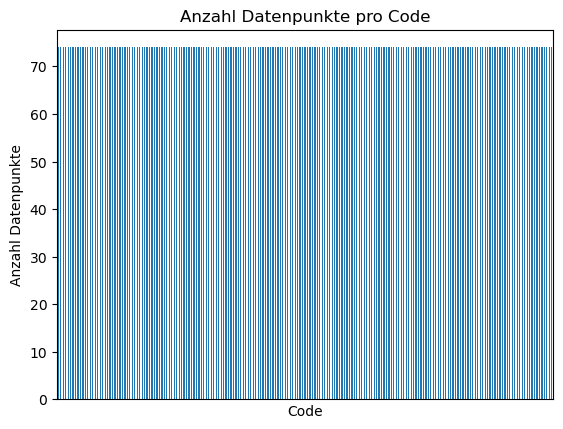

In [164]:
df['Code'].value_counts().plot(kind='bar', xticks=[], ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Code');

## 3.3 Vergleich Anzahl Datenpunkte der Codes und Ethnien

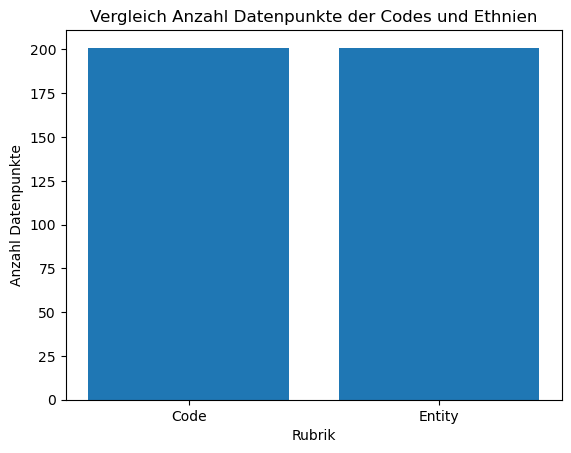

In [165]:
anzahl_codes = df['Code'].nunique()
anzahl_ethnien = df['Entity'].nunique()
plt.bar(['Code', 'Entity'], [anzahl_codes, anzahl_ethnien])
plt.xlabel('Rubrik')
plt.ylabel('Anzahl Datenpunkte')
plt.title('Vergleich Anzahl Datenpunkte der Codes und Ethnien')
plt.show()

## 3.4 Analyse Jahr (Year)

In [166]:
print('Anzahl verschiedener Jahre: ', len(df['Year'].unique()))

Anzahl verschiedener Jahre:  74


In [167]:
# Anzahl Datenpunkte pro Jahr
df['Year'].value_counts().sort_index()

Year
1950    201
1951    201
1952    201
1953    201
1954    201
       ... 
2019    201
2020    201
2021    201
2022    201
2023    201
Name: count, Length: 74, dtype: int64

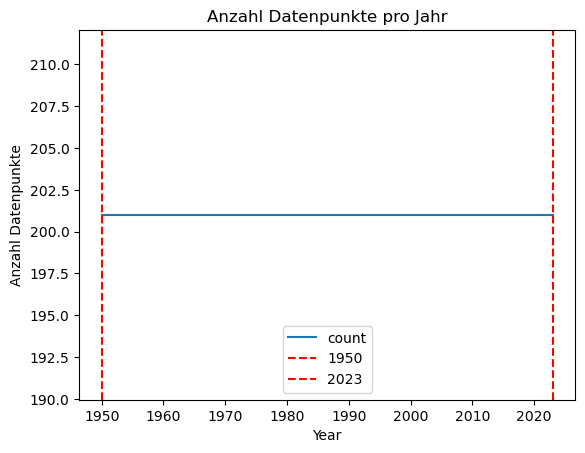

In [168]:
# Jahre mit maximaler Anzahl Datenpunkte (201)
g = df['Year'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr');
g.axvline(x=1950, color='red', label='1950', linestyle= '--')        #rote Linie bei 1950 - Start der Aufzeichnung
g.axvline(x=2023, color='red', label='2023', linestyle= '--')        #rote Linie bei 2023 - Ende der Aufzeichnung 
g.legend()

## 3.5 Analyse Geburtenrate pro 1000 Population (Birth rate)

In [169]:
df.describe

<bound method NDFrame.describe of             Entity Code  Year  Birth rate per 1000 population
0      Afghanistan  AFG  1950                          49.380
1      Afghanistan  AFG  1951                          49.624
2      Afghanistan  AFG  1952                          49.784
3      Afghanistan  AFG  1953                          49.979
4      Afghanistan  AFG  1954                          50.004
...            ...  ...   ...                             ...
14869     Zimbabwe  ZWE  2019                          31.121
14870     Zimbabwe  ZWE  2020                          30.988
14871     Zimbabwe  ZWE  2021                          30.932
14872     Zimbabwe  ZWE  2022                          30.882
14873     Zimbabwe  ZWE  2023                          30.410

[14874 rows x 4 columns]>

In [170]:
max_value = df['Birth rate per 1000 population'].max()
min_value = df['Birth rate per 1000 population'].min()

print(f'Das Maximum ist: {max_value}')
print(f'Das Minimum ist: {min_value}')

Das Maximum ist: 58.627
Das Minimum ist: 4.211


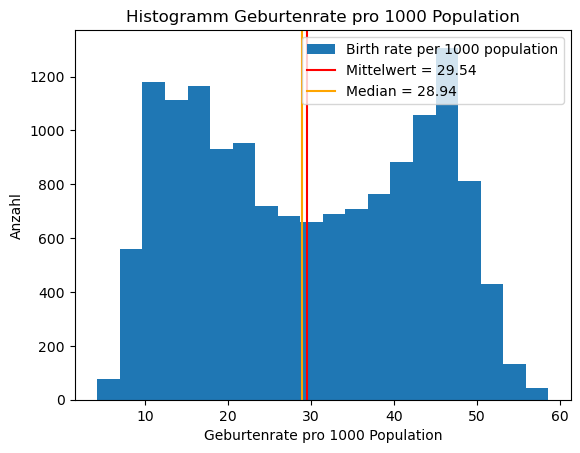

In [171]:
g = df['Birth rate per 1000 population'].plot(kind='hist', bins =20, title= 'Histogramm Geburtenrate pro 1000 Population',                           
                          xlabel= 'Geburtenrate pro 1000 Population', ylabel= 'Anzahl')
mean= df['Birth rate per 1000 population'].mean()
g.axvline(x=df['Birth rate per 1000 population'].mean(), color='red' ,label= f'Mittelwert = {mean:.2f}')       #rote Linie bei Mittelwert

median= df['Birth rate per 1000 population'].median()
g.axvline(x=df['Birth rate per 1000 population'].median(), color='orange' ,label= f'Median = {median:.2f}')     #orange Linie bei Median

g.legend()   

<Axes: title={'center': 'Boxplot Geburtenrate pro 1000 Population'}, xlabel='Geburtenrate pro 1000 Population'>

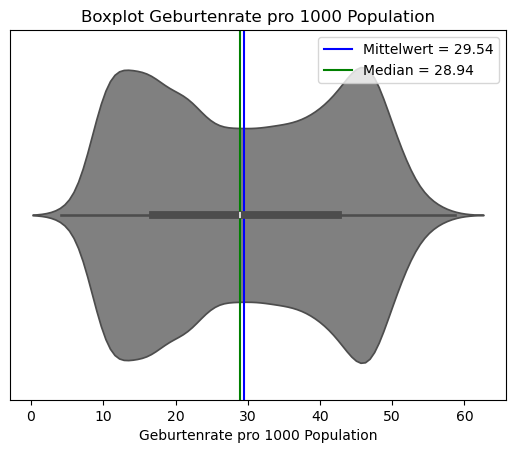

In [193]:
g = df['Birth rate per 1000 population'].plot(kind='box', vert=False, title= 'Boxplot Geburtenrate pro 1000 Population',                           
                          xlabel= 'Geburtenrate pro 1000 Population')
mean= df['Birth rate per 1000 population'].mean()
g.axvline(x=df['Birth rate per 1000 population'].mean(), color='blue' ,label= f'Mittelwert = {mean:.2f}')       #rote Linie bei Mittelwert

median= df['Birth rate per 1000 population'].median()
g.axvline(x=df['Birth rate per 1000 population'].median(), color='green' ,label= f'Median = {median:.2f}')     #orange Linie bei Median

g.legend()   

sns.violinplot(x=df['Birth rate per 1000 population'], density_norm='count', color= 'grey')

# 4. Analyse

## 4.1 Vorgehen

Wie wir beim Punkt 3.3 aufgezeigt haben, beinhaltet unser Datensatz genau gleich viele Codes wie Ethnien. Deshalb analysieren wir ab hier nur noch mit den (Länder-)Codes.

Als erstes erstellen wir eine Pivot-Tabelle mit den Jahren und den dazugehörigen Geburtenraten pro 1000 Population. Danach zeigen wir dies in einem Diagramm auf. Wir analysieren in welchen Jahren, die Geburtenraten speziell gestiegen oder gesunken sind und nennen in der Interpretation die Gründe dafür. Wir berechnen auch die Differenz zwischen dem Jahr mit der höchsten Geburtenrate (1954) und dem Jahr mit der geringsten Geburtenrate (2023). Um die Unterschiede klar aufzuzeigen, werden wir die Resultate ebenfalls in einer Grafik darstellen. Weiter möchten wir evaluieren welche Länder die grössten oder geringsten Veränderungen ihrer Geburtenrate über die Zeit von 74 Jahren aufzeigen. Dies bestimmen wir durch die Berechnung der Standardabweichung. In unserer Interpretation finden Sie die möglichen Gründe dafür, welche anhand von Quellen untersucht wurden.

## 4.2 Beobachtungen

Zum Aufzeichnungsbeginn im Jahr 1950 liegt die Geburtenrate bei knapp 8'000 Geburten pro 1000 Population. Ab dem Jahr 1958 beobachten wir den ersten starken Abfall der Rate. Die Geburten nehmen weiter bis zum Jahr 2023 ab, jedoch nicht stetig. In den Jahren 1978 und 2008 nehmen wir einen Knick im Liniendiagramm wahr. Die Rate bleibt für eine kurze Zeit konstant und sinkt danach wieder.  Für die Interpretation haben wir zwei aussagekräftige Jahreszahlen in der Zeitlinie ausgewählt: 1960 und 2008. (siehe rote und orange gestrichelte Linien)

Das Jahr mit den meisten Geburten war das Jahr 1954, welches 7901.272 Geburten pro 1'000 Population verzeichnete. Das Jahr mit den geringsten Geburtenrate war das Jahr 2023 mit einer Rate von 3588.571 Geburten pro 1'000 Population. Die ausgerechnete Differenz zwischen diesen zwei Jahren liegt bei 4312.701 Geburten pro 1'000 Population. 

Die berechnete Standardabweichung zeigt, dass das Land mit den stärksten Abweichungen der Iran ist mit 14.45 (gerundet).
Die kleinste Standardabweichung gehört zu Zentralafrika und liegt bei 1.61 (gerundet). Dieser Unterschied sieht man am beigefügten Balkendiagramm visuell sehr gut.

Beim Liniendiagramm zum Schluss wird sehr gut verdeutlicht, dass der Iran grosse Unterschiede/Abweichungen in der Geburtenrate von 1950 bis 2023 hat. 2023 gab es viel weniger Geburten im Gegensatz zu 1950. In Zentralafrika änderte sich die Geburtenrate weniger stark bis kaum.

## 4.3 Interpretationen

Weltweit ist ein Rückgang der Geburtenrate seit 1950 ersichtlich. Dieser Rückgang lässt sich auf eine Vielzahl von Faktoren zurückführen, die sowohl sozioökonomische als auch kulturelle Veränderungen umfassen. Beispielsweise wurde der Zugang zu Verhütungsmitteln verbessert, sodass Paare die Familienplanung effektiver steuern und die Anzahl der Kinder bewusst begrenzen können. (Bundeszentrale für politische Bildung)
Ebenfalls ist die Urbanisierung ein weiterer Grund; Der Umzug in städtische Gebiete veränderte Lebensbedingungen und -kosten, wodurch kleinere Familien bevorzugt wurden. (SwissInfo) 
Ein wichtiger Punkt sind auch wirtschaftliche Überlegungen, da die steigenden Lebenserhaltungskosten, insbesondere für Wohnen und Bildung, sowie wirtschaftliche Unsicherheiten die Entscheidung vieler Paare, weniger Kinder zu bekommen, beeinflussen. (Wüest Partner)
Weiter gelten auch gesundheitliche Verbesserungen als ein Grund. Ein Rückgang der Kindersterblichkeit führte dazu, dass weniger Geburten erforderlich waren, um die gewünschte Familiengrösse zu erreichen. (Global Citizen)

Im Jahre 1960 sank die Geburtenrate signifikant, da mit der Einführung der Antibabypille viele ungeplante Schwangerschaften und Geburten verhindert werden konnten. Ebenfalls erlangten die Frauen durch die zunehmende Erwerbstätigkeit und den Wunsch nach höherer Bildung eine gewisse Eigenständigkeit, was dazu führte, dass die Familiengründung aufgeschoben und die Anzahl der Kinder reduziert wurde. (Bundeszentrale für politische Bildung)

Im Jahre 2008 löste die damalige Wirtschaftskrise in vielen Ländern eine wirtschaftliche Unsicherheit aus, was die Familienplanung beeinflusste und zu einem Rückgang der Geburtenraten beitrug. (OECD Ilibrary) Veränderte Lebensentwürfe, also ein zunehmender Individualismus und die Suche nach persönlicher Erfüllung ausserhalb der traditionellen Familienstruktur, führten dazu, dass weniger Menschen Eltern werden wollten. (Wüest Partner)
Weitere allgemeinere Gründe zum Rückgang der Geburtenraten in den Jahren 1960 und 2008 wurden im ersten Abschnitt bereits erwähnt. 

Einer der schnellsten und drastischen Geburtenrückgänge erlebte der Iran ab Mitte der 1980er-Jahre. Diese sind zurückzuführen auf das Ende des Iran-Irak-Krieges (1980-1988). Nach dem Krieg erkannte die Regierung die Notwendigkeit, das Bevölkerungswachstum zu kontrollieren, um wirtschaftliche und soziale Herausforderungen zu bewältigen. Zum Erreichen dieses Ziels wurden umfassende Familienplanungsprogramme eingeführt, welche den Zugang zu Verhütungsmitteln erleichterten und Aufklärung förderten. (Freie Welt)

## 4.4 Quellen (Interpretation)

- https://www.bpb.de/shop/zeitschriften/izpb/demografischer-wandel-350/507788/die-ursachen-der-geburtenentwicklung/

- https://www.swissinfo.ch/ger/leben-und-altern/die-fertilit%C3%A4t-bricht-in-der-schweiz-ein-wie-fast-%C3%BCberall-auf-der-welt/72927926?

- https://www.wuestpartner.com/ch-de/2024/07/10/schweizer-geburtenrate-auf-historischem-tiefstand-beleuchtung-der-ursachen-und-folgen-dieses-demografischen-phaenomens/?

- https://www.globalcitizen.org/de/content/fertility-rate-drop/?

- https://www.oecd.org/content/dam/oecd/de/publications/reports/2016/04/oecd-factbook-2015-2016_g1g63c47/factbook-2015-de.pdf

- https://www.freiewelt.net/blog/iranischer-geburtenrueckgang-4343/?

# 5 Berechnungen und Visualisierungen

## 5.1 Veränderungen der Summe der Geburtenrate über die Jahre (1950-2023)

In [172]:
df_pivot = df.pivot(index='Year', columns='Code', values='Birth rate per 1000 population')
df_pivot.head()


Code,ABW,AFG,AGO,AIA,ALB,AND,ARE,ARG,ARM,ATG,...,VAT,VCT,VEN,VNM,VUT,WSM,YEM,ZAF,ZMB,ZWE
Year,,,,,,,,,,,,,,,,,,,,,
1950,41.571,49.380,44.290,50.929,39.298,15.345,45.566,26.037,34.479,36.547,...,7.471,52.251,46.802,38.776,41.617,53.443,52.763,40.964,50.110,50.287
1951,40.896,49.624,45.015,51.237,39.659,16.850,44.194,25.945,35.170,36.192,...,7.578,51.936,47.208,34.849,42.230,53.447,53.251,41.090,49.798,49.950
1952,40.129,49.784,46.163,51.643,39.790,16.899,43.069,25.790,35.791,35.948,...,7.712,51.691,47.460,40.712,42.848,53.419,53.665,41.120,49.642,49.554
1953,39.126,49.979,47.224,51.289,40.692,16.663,42.133,25.601,36.511,35.731,...,7.866,51.422,47.557,38.962,43.413,53.221,54.028,41.076,49.502,49.201
1954,38.030,50.004,48.186,50.046,41.433,15.891,41.436,25.342,37.302,35.676,...,8.021,51.148,47.537,42.425,43.970,53.013,54.393,40.936,49.340,48.855


In [173]:
pivot_table = pd.pivot_table(df,
                             values='Birth rate per 1000 population',
                             index='Year',
                             aggfunc='sum')
print(pivot_table)

      Birth rate per 1000 population
Year                                
1950                        7897.563
1951                        7876.253
1952                        7899.769
1953                        7895.823
1954                        7901.272
...                              ...
2019                        3861.075
2020                        3779.491
2021                        3722.471
2022                        3644.367
2023                        3588.571

[74 rows x 1 columns]


In [201]:
# Maximum und Minimum der summierten Geburtenraten berechnen
max_value = pivot_table['Birth rate per 1000 population'].max()
min_value = pivot_table['Birth rate per 1000 population'].min()

# Das Jahr mit dem Maximum finden
max_year = pivot_table['Birth rate per 1000 population'].idxmax()

# Das Jahr mit dem Minimum finden
min_year = pivot_table['Birth rate per 1000 population'].idxmin()

# Ausgabe der Ergebnisse
print("\nMaximum der Geburtenrate pro Jahr:")
print(f"Jahr: {max_year}, Wert: {max_value}")

print("\nMinimum der Geburtenrate pro Jahr:")
print(f"Jahr: {min_year}, Wert: {min_value}")


Maximum der Geburtenrate pro Jahr:
Jahr: 1954, Wert: 7901.272

Minimum der Geburtenrate pro Jahr:
Jahr: 2023, Wert: 3588.571


Text(2007.5, 3800, 'Weltwirtschaftskrise')

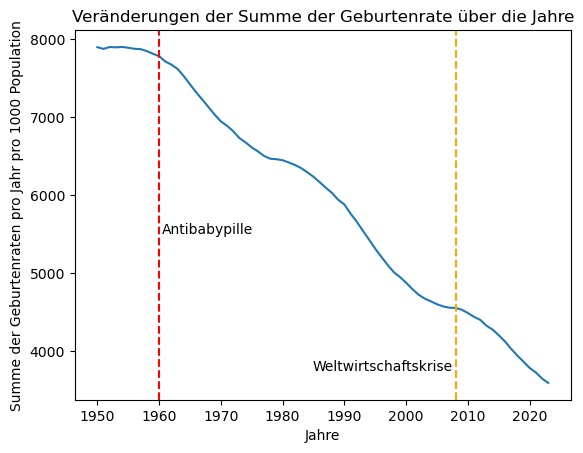

In [195]:
g = pivot_table.plot(kind='line', legend=False)
plt.title('Veränderungen der Summe der Geburtenrate über die Jahre')
plt.xlabel('Jahre')
plt.ylabel('Summe der Geburtenraten pro Jahr pro 1000 Population')

#Antibabypille
g.axvline(x=1960, color= 'red', linestyle= '--')
g.text(1960.5, 5500, 'Antibabypille')

#Wirtschaftskrise
g.axvline(x=2008, color='orange', linestyle='--')
g.text(2007.5, 3800, 'Weltwirtschaftskrise',
       ha='right', va='center', color='black', fontsize= 10)


## 5.2 Berechnung der Differenzen von 1954 bis 2023

In [175]:
print(pivot_table.columns)

Index(['Birth rate per 1000 population'], dtype='object')


In [202]:
# Differenz berechnen
diffs= pivot_table.loc[1954]- pivot_table.loc[2023]
diffs = diffs.sort_values().dropna()
print(diffs)

Birth rate per 1000 population    4312.701
dtype: float64


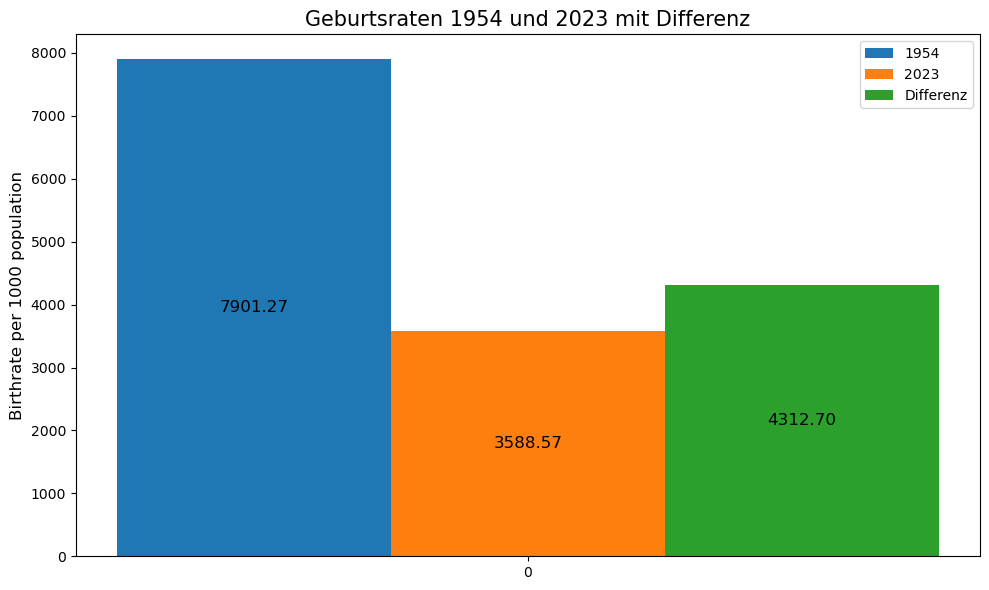

In [203]:
#Geburtsraten-Daten vorbereiten von 1954
births_1954=pivot_table.loc[1954]  

#Geburtsraten-Daten vorbereiten von 2023
births_2023=pivot_table.loc[2023]       

diffs= births_1954 - births_2023

#DataFrame für die Gfrafik erstellen
data= pd.DataFrame({                  
    '1954': births_1954,
    '2023': births_2023,
    'Differenz': diffs})

#Breite der Balken und Positionen
bar_width = 0.25
x = range(len(data))

#Plot erstellen
fig, ax = plt.subplots(figsize=(10,6))

#Balken für 1954
b1= ax.bar([pos - bar_width for pos in x], data['1954'], bar_width, label='1954')

#Balken für 2023
b2= ax.bar(x, data['2023'], bar_width, label='2023')

#Baleken für Differenz
b3= ax.bar([bar_width for pos in x], data['Differenz'], bar_width, label='Differenz')

# Zahlen in die Balken einfügen
for rect, value in zip(b1, data['1954']):
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() / 2, f'{value:.2f}', 
            ha='center', va='center', fontsize=12, color='black')

for rect, value in zip(b2, data['2023']):
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() / 2, f'{value:.2f}', 
            ha='center', va='center', fontsize=12, color='black')

for rect, value in zip(b3, data['Differenz']):
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() / 2, f'{value:.2f}', 
            ha='center', va='center', fontsize=12, color='black')

#Achsentitel und Labels
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('Birthrate per 1000 population', fontsize=12)
ax.set_title('Geburtsraten 1954 und 2023 mit Differenz', fontsize=15)
ax.set_xticks(x)

#Legende
ax.legend()

#layout optimieren
plt.tight_layout()

#Grafik anzeigen
plt.show()




## 5.3 Berechnungen stärkste und schwächste Abweichung (Standardabweichung)

In [178]:
#Standartabweichung für die Codes berechnen
std_dev_codes= df_pivot.std(axis=0)

print('Standardabweichung pro Code:')
print(std_dev_codes)


Standardabweichung pro Code:
Code
ABW     8.788110
AFG     5.270508
AGO     3.860837
AIA    13.157319
ALB    10.528313
         ...    
WSM     8.421756
YEM     8.390043
ZAF     8.167200
ZMB     4.775769
ZWE     6.401282
Length: 201, dtype: float64


In [179]:
land_hoechste_std = std_dev_codes.idxmax()  # Land mit höchster Standardabweichung 
hoechste_std = std_dev_codes.max() # Wert der höchsten Standardabweichung 

land_tiefste_std = std_dev_codes.idxmin() # Land mit niedrigster Standardabweichung 
tiefste_std = std_dev_codes.min() # Wert der niedrigsten Standardabweichung 
# Ergebnisse anzeigen 
print(f"Land mit der höchsten Standardabweichung: {land_hoechste_std} ({hoechste_std:.2f})") 
print(f"Land mit der niedrigsten Standardabweichung: {land_tiefste_std} ({tiefste_std:.2f})")

Land mit der höchsten Standardabweichung: IRN (14.45)
Land mit der niedrigsten Standardabweichung: CAF (1.61)


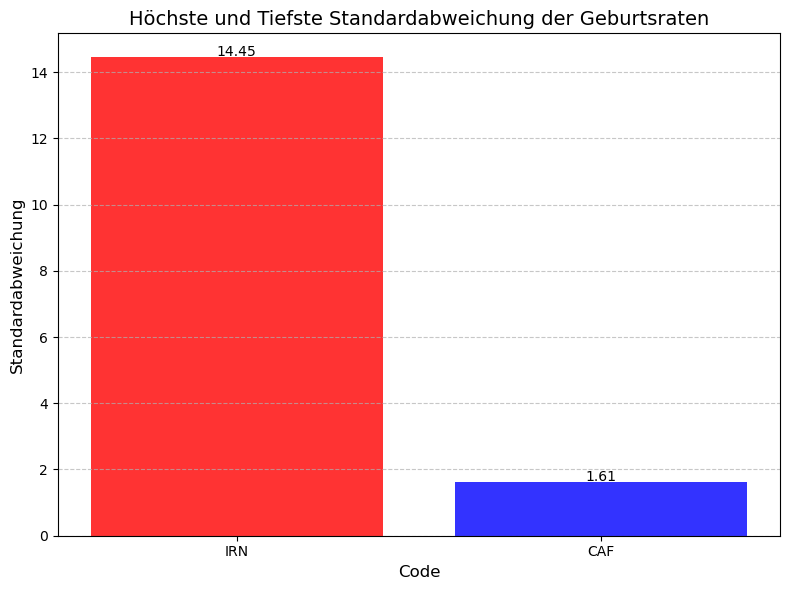

In [180]:
# Standardabweichung berechnen 
std_dev_codes = df_pivot.std(axis=0) 

# Höchste und niedrigste Standardabweichung identifizieren 
land_hoechste_std = std_dev_codes.idxmax() 
hoechste_std = std_dev_codes.max() 
land_tiefste_std = std_dev_codes.idxmin() 
tiefste_std = std_dev_codes.min() 

# Daten für den Plot vorbereiten 
values = [hoechste_std, tiefste_std] 
labels = [land_hoechste_std, land_tiefste_std] 
colors = ['red', 'blue'] 

# Bar-Plot erstellen 
plt.figure(figsize=(8, 6)) 
plt.bar(labels, values, color=colors, alpha=0.8) 

# Titel und Achsenbeschriftung hinzufügen 
plt.title('Höchste und Tiefste Standardabweichung der Geburtsraten', fontsize=14) 
plt.ylabel('Standardabweichung', fontsize=12) 
plt.xlabel('Code', fontsize=12) 

# Werte auf die Balken schreiben 
for i, v in enumerate(values): 
    plt.text(i, v + 0.05, f'{v:.2f}', ha='center', fontsize=10) 
    
# Plot anzeigen 
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout() 
plt.show()

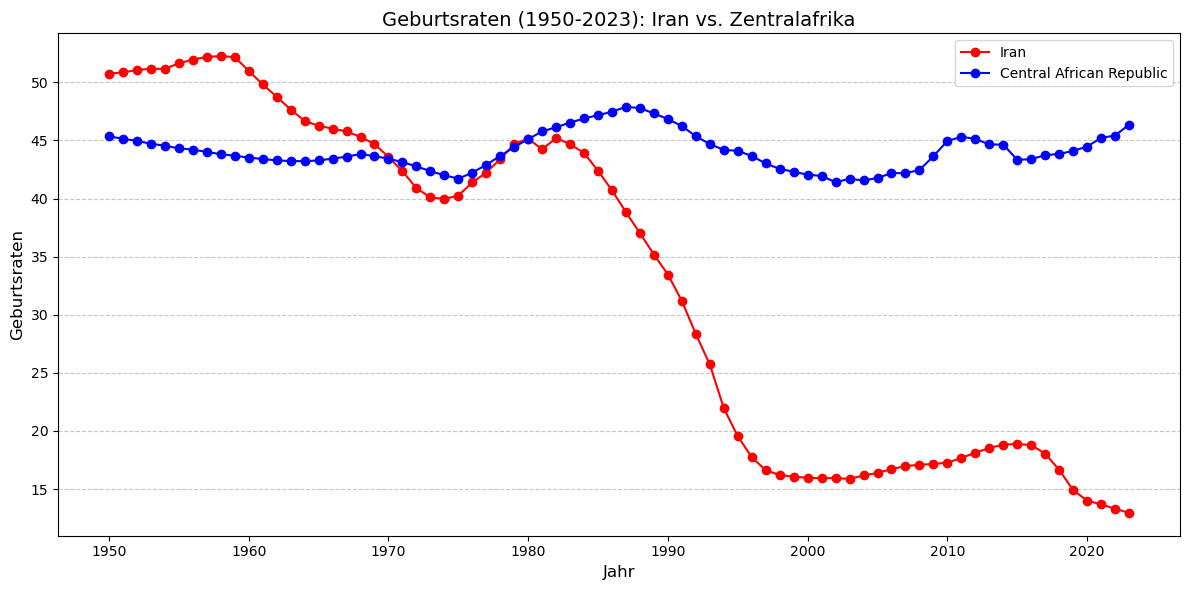

In [181]:
# Geburtsraten-Daten für Iran und Zentralafrika 
iran_data = df_pivot['IRN'] 
central_africa_data = df_pivot['CAF'] 

# Plot erstellen 
plt.figure(figsize=(12, 6)) 
plt.plot(iran_data.index, iran_data, label='Iran', color='red', marker='o') 
plt.plot(central_africa_data.index, central_africa_data, label='Central African Republic', color='blue', marker='o') 

# Titel und Achsenbeschriftung hinzufügen 
plt.title('Geburtsraten (1950-2023): Iran vs. Zentralafrika', fontsize=14) 
plt.ylabel('Geburtsraten', fontsize=12) 
plt.xlabel('Jahr', fontsize=12) 

# Legende und Raster 
plt.legend(fontsize=10) 
plt.grid(axis='y', linestyle='--', alpha=0.7) 

# Plot anzeigen 
plt.tight_layout() 
plt.show()